# Project 02 - Image Processing

## Thông tin sinh viên

- Họ và tên: Trương Công Thiên Phú
- MSSV: 23127455
- Lớp: 23CLC05

## Import các thư viện liên quan

In [244]:
from PIL import Image # for read, write image
import numpy as np # for matrix compute
import matplotlib.pyplot as plt # for show image
import colorsys # for convert RGB to HSL

## Helper functions

In [ ]:
# Any optional parameters beyond the required ones should be defined with default values

def read_img(img_path):
    ''' Read image from img_path
    returns a 2D image (numpy array)
    '''
    img = Image.open(img_path)
    return np.array(img) / 255.0

def show_img(img_2d):
    ''' Show image
    '''
    plt.imshow(img_2d)
    plt.axis("off")
    plt.show()

def convert_rgb_to_hsl(img_2d):
    ''' Convert RGB image to HSL image
    returns a 2D image (numpy array)
    '''
    if img_2d.dtype != np.float32 and img_2d.dtype != np.float64:
        img_2d = img_2d / 255.0

    height, width, _  = img_2d.shape
    
    hls_img_2d = np.zeros_like(img_2d) 

    for i in range(height):
        for j in range(width):
            r, g, b = img_2d[i, j]
            h, l, s = colorsys.rgb_to_hls(r, g, b)
            hls_img_2d[i, j] = [h, l, s]

    return hls_img_2d            

def convert_hsl_to_rgb(img_2d):
    ''' Convert HSL image to RGB image
    returns a 2D image (numpy array)
    '''    

    height, width, _ = img_2d.shape    
    rgb_img_2d = np.zeros_like(img_2d)

    for i in range(height):
        for j in range(width):
            h, l, s = img_2d[i, j]
            r, g, b = colorsys.hls_to_rgb(h, l, s)
            rgb_img_2d[i, j] = [r , g, b]
    
    return rgb_img_2d
                
def process_image(img_2d, func=[1, 2, 3,...], image_name='Lenna.png'):
    ''' Process image with a list of functions
    func: a list of functions to apply to the image
    return processed 2D image
    '''
    is_saved = False
    function_zero = 0
    if function_zero in func:
        is_saved = True
    
    func = [x for x in func if x >= 1 and x <= 7]
    
    for function in func:
        if function == 1:
            new_brightness_image = change_image_brightness(img_2d)
            show_img(new_brightness_image)
            if is_saved == True:
                save_image(image_name, new_brightness_image, 'change_brightness')
        elif function == 2:
            new_contrast_image = change_image_constrast(img_2d)
            show_img(new_contrast_image)
            if is_saved == True:
                save_image(image_name, new_contrast_image, 'change_contrast')
        elif function == 3:
            flipped_horizontal_image, flipped_vertical_image = flip_image(img_2d)                
            show_img(flipped_horizontal_image)
            show_img(flipped_vertical_image)
            if is_saved == True:
                save_image(image_name, flipped_horizontal_image, 'flip_horizontally')
                save_image(image_name, flipped_vertical_image, 'flip_vertically')
        elif function == 4:
            gray_image, sepia_image = change_image_to_grayscale_and_sepia(img_2d)                
            show_img(gray_image)
            show_img(sepia_image)
            if is_saved == True:
                save_image(image_name, gray_image, 'grayscale')
                save_image(image_name, sepia_image, 'sepia')
        elif function == 5:
            blur_image, sharpen_image = blur_and_sharpen_image(img_2d)
            show_img(blur_image)
            show_img(sharpen_image)
            if is_saved == True:
                save_image(image_name, blur_image, 'blur')
                save_image(image_name, sharpen_image, 'sharpen')
        elif function == 6:
            cropped_image = crop_quarter_image(img_2d)                
            show_img(cropped_image)
            if is_saved == True:
                save_image(image_name, cropped_image, 'crop_at_center')
        elif function == 7:
            circular_frame, elliptical_frame = crop_image_on_circular_and_elliptical_frame(img_2d)                
            show_img(circular_frame)
            show_img(elliptical_frame)
            if is_saved == True:
                save_image(image_name, circular_frame, 'circular_frame')
                save_image(image_name, elliptical_frame, 'elliptical_frame')
#Additional functions

#Change image brightness
def change_image_brightness(img_2d):    
    brigthness = input("Enter either 0 or 1 to decrease or increase the image brightness: ")
    if brigthness != '0' and brigthness != '1':
        brigthness = '1' 

    hsl_img_2d = convert_rgb_to_hsl(img_2d)
    new_image = None

    if brigthness == '0':
        new_image = decrease_image_brightness(hsl_img_2d)
        new_image = convert_hsl_to_rgb(new_image)
    else:
        new_image = increase_image_brightness(hsl_img_2d)
        new_image = convert_hsl_to_rgb(new_image)    
            
    return new_image
                   
def increase_image_brightness(hsl_img_2d):
    height, width, _ = hsl_img_2d.shape    
    brighter_image = np.zeros_like(hsl_img_2d)

    for i in range(height):
        for j in range(width):
            h, l, s = hsl_img_2d[i, j]
            l = min(1, l + 0.3)
            brighter_image[i, j] = [h, l, s]

    return brighter_image

def decrease_image_brightness(hsl_img_2d):
    height, width, _ = hsl_img_2d.shape    

    darker_image = np.zeros_like(hsl_img_2d)    

    for i in range(height):
        for j in range(width):
            h, l, s = hsl_img_2d[i, j]
            l = max(0, l - 0.3)
            darker_image[i, j] = [h, l, s]
    
    return darker_image

#Change image contrast
def change_image_constrast(img_2d):
    contrast_value = input("Enter contrast value (any number): ")
    contrast_value = float(contrast_value)

    hls_image_2d = convert_rgb_to_hsl(img_2d)
    height, width, _ = img_2d.shape

    for i in range(height):
        for j in range(width):
            h, l, s = hls_image_2d[i, j]
            l = 0.5 + contrast_value * (l - 0.5)
            if l > 1:
                l = 1
            elif l < 0:
                l = 0

            hls_image_2d[i, j] = [h, l, s]

    new_image = convert_hsl_to_rgb(hls_image_2d)         

    return new_image

#Flip image
def flip_image(img_2d):
    flipped_horizontal_image = flip_image_horizontally(img_2d)
    flipped_vertical_image = flip_image_vertically(img_2d)

    return flipped_horizontal_image, flipped_vertical_image

def flip_image_horizontally(img_2d):
    height, _, _ = img_2d.shape
    flipped_horizontal_image = np.zeros_like(img_2d)

    for i in range(height):
        flipped_horizontal_image[i] = img_2d[i, ::-1]    

    return flipped_horizontal_image

def flip_image_vertically(img_2d):
    height, _, _ = img_2d.shape
    flipped_vertical_image = np.zeros_like(img_2d)

    for i in range(height):
        flipped_vertical_image[height - 1 - i] = img_2d[i]

    return flipped_vertical_image

#Change image to gray/sepia image
def change_image_to_grayscale_and_sepia(img_2d):
    gray_image = change_image_to_grayscale(img_2d)
    sepia_image = change_image_to_sepia(img_2d)

    return gray_image, sepia_image

def change_image_to_grayscale(img_2d):
    height, width, _ = img_2d.shape
    gray_image = np.zeros_like(img_2d)

    for i in range(height):
        for j in range(width):
            r, g, b = img_2d[i, j]            
            gray_scale = 0.299 * r + 0.587 * g + 0.114 * b
            gray_image[i, j] = [gray_scale, gray_scale, gray_scale]

    return gray_image

def change_image_to_sepia(img_2d):
    height, width, _ = img_2d.shape
    sepia_image = np.zeros_like(img_2d)
    max_rgb_value = 1.0

    for i in range(height):
        for j in range(width):
            r, g, b = img_2d[i, j]
            tr = 0.393 * r + 0.769 * g + 0.189 * b
            tg = 0.349 * r + 0.686 * g + 0.168 * b
            tb = 0.272 * r + 0.534 * g + 0.131 * b

            r = tr if tr <= 1.0 else max_rgb_value
            g = tg if tg <= 1.0 else max_rgb_value
            b = tb if tb <= 1.0 else max_rgb_value
            sepia_image[i, j] = [r, g, b]

    return sepia_image          

#blur/sharpen image
def blur_and_sharpen_image(img_2d):
    blur_kernel = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
    ])

    sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
    ])

    blur_image = kernel_processing(img_2d, blur_kernel)
    sharpen_image = kernel_processing(img_2d, sharpen_kernel)

    return blur_image, sharpen_image

def kernel_processing(img_2d, kernel):
    # if img_2d.ndim == 2:  
    #     img_2d = img_2d[:, :, np.newaxis]

    h, w, c = img_2d.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(img_2d, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='edge')
    output = np.zeros((h, w, c), dtype=np.float32)

    for y in range(h):
        for x in range(w):
            for ch in range(c):
                region = padded[y:y+kh, x:x+kw, ch]
                output[y, x, ch] = np.sum(region * kernel)    
                
    return np.clip(output, 0, 1)

#crop image
def crop_quarter_image(img_2d):    
    height, width, _ = img_2d.shape

    new_heigth = height // 2
    new_width = width // 2
    left = new_width // 2
    top = new_heigth // 2
    right = left + new_heigth
    bottom = top + new_heigth

    cropped_image = np.zeros((new_heigth, new_width, 3))

    for i in range(top, bottom):
        for j in range(left, right):
            cropped_image[i - top, j - left] = img_2d[i, j]

    return cropped_image      

#crop image based on frame
def crop_image_on_circular_and_elliptical_frame(img_2d):
    cicurlar_frame = crop_image_on_circular_frame(img_2d)
    elliptical_frame = crop_image_on_elliptical_frame(img_2d)

    return cicurlar_frame, elliptical_frame    

def crop_image_on_circular_frame(img_2d, radius_scale=1.0):
    height, width, _ = img_2d.shape    
    
    half_height = height // 2
    half_width = width // 2
    radius = min(half_height, half_width) // radius_scale
    Y, X = np.ogrid[:height, :width]
    frame = np.sqrt((Y - half_height) ** 2 + (X - half_width) ** 2)    
    not_black_areas = frame <= radius

    circular_frame_image = img_2d.copy()
    circular_frame_image[~not_black_areas] = [0, 0, 0]

    return circular_frame_image    

def crop_image_on_elliptical_frame(img_2d, semi_major_axis_divided = 2.25, semi_minor_axis_divided=2, first_ellipse_rotation=45, second_ellipse_rotation=135):
    height, width, _ = img_2d.shape
    a = np.sqrt(height ** 2 + width ** 2) // semi_major_axis_divided
    b = a // semi_minor_axis_divided
    c = np.sqrt(a ** 2 - b ** 2)

    center_x, center_y = width // 2, height // 2
    general_area_radius = b
    
    Y, X = np.ogrid[:height, :width]
    general_areas = np.sqrt((Y - center_y) ** 2 + (X - center_x) ** 2)
    not_black_areas_1 = general_areas <= general_area_radius
    
    mask_1 = find_ellipse_mask(height, width, center_x, center_y, a, b, first_ellipse_rotation)
    mask_2 = find_ellipse_mask(height, width, center_x, center_y, a, b, second_ellipse_rotation)
    mask = mask_1 | mask_2

    elliptical_frame_image = img_2d.copy()
    elliptical_frame_image[~mask] = [0, 0, 0]

    return elliptical_frame_image        

def find_ellipse_mask(height, width, center_x, center_y, a, b, angle_deg=45):    
    angle_rad = np.deg2rad(angle_deg)
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)

    Y, X = np.ogrid[:height, :width]
    Xc = X - center_x
    Yc = Y - center_y

    X_rot = Xc * cos_theta + Yc * sin_theta
    Y_rot = -Xc * sin_theta + Yc * cos_theta

    ellipse_eq = (X_rot ** 2) / (a ** 2) + (Y_rot ** 2) / (b ** 2)
    mask = ellipse_eq <= 1
    return mask    

#Save image
def save_image(image_name, img_2d, function_name):    
    last_dot_position = image_name.rfind('.')
    saved_image_name = image_name[:last_dot_position] + '_' + function_name + image_name[last_dot_position:]

    plt.imsave(saved_image_name, img_2d)
    

## Your tests

In [ ]:
# YOUR CODE HERE
img_path = 'Lenna.png'
img_2d = read_img(img_path)



# show_img(img_2d)
# #print(convert_rgb_to_hsl(img_2d))
# # new_image = change_image_brightness(img_2d)
# # show_img(new_image)
# # new_image = change_image_constrast(img_2d)
# # show_img(new_image)
# horizontal, vertical = flip_image(img_2d)
# show_img(horizontal)
# show_img(vertical)
# # grayscale, sepia = change_image_to_grayscale_and_sepia(img_2d)
# # show_img(grayscale)
# # show_img(sepia)
# # cropped_image = crop_quarter_image(img_2d)
# # show_img(cropped_image)
# #main()
# # hsl_img = convert_rgb_to_hsl(img_2d)
# # new_image = increase_image_brightness(hsl_img)

# # show_img(new_image)
# # new_image = convert_hsl_to_rgb(new_image)
# # show_img(new_image)

# # blur_image, sharpen_image = blur_and_sharpen_image(img_2d)
# # show_img(blur_image)
# # show_img(sharpen_image)

# c, e = crop_image_on_circular_and_elliptical_frame(img_2d)
# show_img(c)
# show_img(e)

## Main FUNCTION

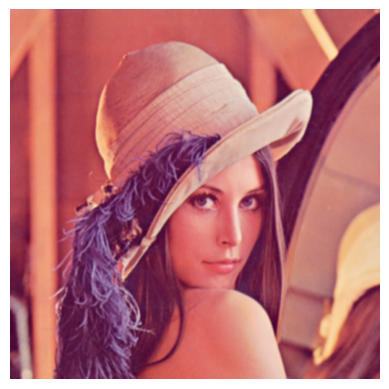

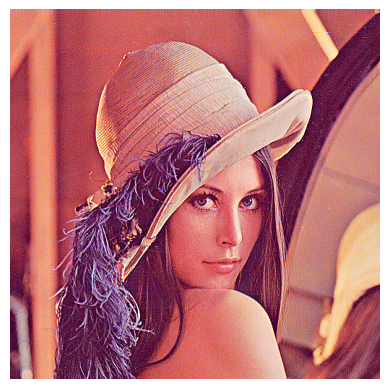

In [247]:
# YOUR CODE HERE
def main(): 
    image_path = 'Lenna.png'
    img_2d = read_img(image_path)

    functions = input("Enter the functions you want to execute (0 - 7) (e.g, '0 1 2'): ")
    functions = functions.split()
    functions = [int(function) for function in functions]

    process_image(img_2d, functions)

if __name__ == '__main__':
    main()